Import

In [44]:
import pandas as pd
import numpy as np
from datetime import datetime
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from matplotlib import pyplot as plt
import seaborn as sns

Load Data

In [45]:
data = pd.read_csv('cleandata.csv')

def creation_year(year):
    dt = datetime.strptime(str(year), '%Y-%m-%d %H:%M:%S')
    return dt.year

y = data.account_type.values.tolist()

def extract_features(x):
    columns=['favourites_count','followers_count','friends_count','statuses_count','verified','created']
    # x.loc[:,'created']= creation_year(x['created_at'])
    x.loc[:,'created'] = x.apply(lambda row :creation_year(row["created_at"]), axis=1)
    x=x.loc[:,columns]
    return x

x_train, x_test, y_train, y_test = train_test_split(extract_features(data), y, test_size=0.2, random_state=48)

Split the data into training and testing sets

In [46]:
from torch.utils.data import random_split

# Split into training and validation sets
train_size = int(0.1 * len(data))
val_size = len(data) - train_size

train, test= random_split(data, [train_size, val_size])

f'There are {train_size} samples for training, and {val_size} samples for validation testing'



'There are 3743 samples for training, and 33695 samples for validation testing'

Train the Logistic Regression model

In [47]:
lr = LogisticRegression(random_state=48)
%time lr.fit(x_train,y_train)

y_pred_train = lr.predict(x_train)
y_pred_test = lr.predict(x_test)
print("\nTraining Accuracy score:",accuracy_score(y_train, y_pred_train))
print("Testing Accuracy score:",accuracy_score(y_test, y_pred_test))

CPU times: user 207 ms, sys: 138 ms, total: 345 ms
Wall time: 106 ms

Training Accuracy score: 0.6737562604340568
Testing Accuracy score: 0.6625267094017094


Calculate the accuracy of the model

In [48]:
def accurracy(y_true,y_pred_test):
    return np.sum(y_true==y_pred_test)/len(y_true)
print('Accuracy  classification :',accurracy(y_test,y_pred_test))


Accuracy  classification : 0.6625267094017094


Calculate the classification report of the model

In [49]:
print("classification_report \n "+classification_report(y_test, y_pred_test))

classification_report 
               precision    recall  f1-score   support

         bot       0.59      0.01      0.03      2537
       human       0.66      1.00      0.80      4951

    accuracy                           0.66      7488
   macro avg       0.62      0.50      0.41      7488
weighted avg       0.64      0.66      0.54      7488



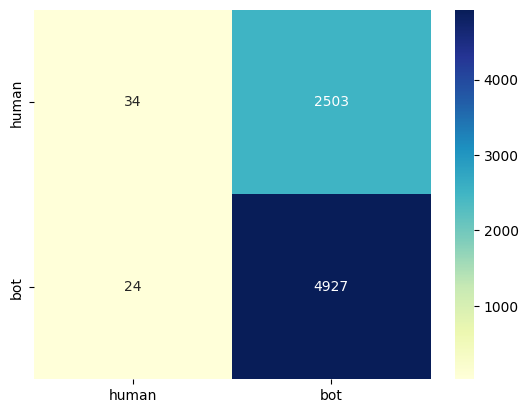

In [51]:
cm = metrics.confusion_matrix(y_test,  y_pred_test)

cm_matrixNB = pd.DataFrame(data=cm, columns=[ 'human', 'bot'], 
                        index=[ 'human', 'bot'])
sns.heatmap(cm_matrixNB, annot=True, fmt='d', cmap='YlGnBu')
plt.show()
